In [1]:
# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import ConvLSTM2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
# tensorflow version
tf.__version__

'2.4.1'

In [3]:
plt.style.use('seaborn-whitegrid')
#plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
fn = '/home/jefire/project/water/input/niamey_gpm_data_2001_2020.csv'

In [5]:
df = pd.read_csv(fn)
df

,date,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
0,1/6/2001,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
1,1/7/2001,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2,1/8/2001,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
3,1/9/2001,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
4,1/10/2001,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...,...
7096,6/11/2020,0.000880,211.958244,30.802840,26.469141,32.474561,55.10
7097,6/12/2020,0.000388,214.029747,32.441933,26.958002,32.483956,55.10
7098,6/13/2020,0.000030,218.132397,33.119534,26.481450,32.476045,56.45
7099,6/14/2020,0.000017,230.722169,32.874195,26.987434,32.454815,167.03


In [6]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
0,1/6/2001,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
1,1/7/2001,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2,1/8/2001,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
3,1/9/2001,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
4,1/10/2001,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...,...
7096,6/11/2020,0.000880,211.958244,30.802840,26.469141,32.474561,55.10
7097,6/12/2020,0.000388,214.029747,32.441933,26.958002,32.483956,55.10
7098,6/13/2020,0.000030,218.132397,33.119534,26.481450,32.476045,56.45
7099,6/14/2020,0.000017,230.722169,32.874195,26.987434,32.454815,167.03


In [7]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
0,2001-01-06,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
1,2001-01-07,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2,2001-01-08,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
3,2001-01-09,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
4,2001-01-10,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...,...
7096,2020-06-11,0.000880,211.958244,30.802840,26.469141,32.474561,55.10
7097,2020-06-12,0.000388,214.029747,32.441933,26.958002,32.483956,55.10
7098,2020-06-13,0.000030,218.132397,33.119534,26.481450,32.476045,56.45
7099,2020-06-14,0.000017,230.722169,32.874195,26.987434,32.454815,167.03


In [8]:
# get summary statistics
df_copy.describe()

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
count,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000
mean,3.723379,820.862144,28.901515,28.826117,28.895460,944.094060
std,5.749542,437.347298,3.213747,3.198300,3.035682,659.307962
min,0.000000,89.347297,18.093447,18.093447,20.373102,12.180000
25%,0.037339,380.189194,27.041864,26.987906,27.203284,222.600000
50%,0.899608,887.606406,29.226387,29.139395,29.169763,1050.400000
75%,5.231491,1219.299519,31.271360,31.134483,31.319446,1513.770000
max,47.122757,1538.800516,35.709473,35.709473,34.694640,2677.000000


In [9]:
# get summary statistics
df_copy.describe()

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
count,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000
mean,3.723379,820.862144,28.901515,28.826117,28.895460,944.094060
std,5.749542,437.347298,3.213747,3.198300,3.035682,659.307962
min,0.000000,89.347297,18.093447,18.093447,20.373102,12.180000
25%,0.037339,380.189194,27.041864,26.987906,27.203284,222.600000
50%,0.899608,887.606406,29.226387,29.139395,29.169763,1050.400000
75%,5.231491,1219.299519,31.271360,31.134483,31.319446,1513.770000
max,47.122757,1538.800516,35.709473,35.709473,34.694640,2677.000000


In [10]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-10-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    7101
unique                   7101
top       2001-01-06 00:00:00
freq                        1
first     2001-01-06 00:00:00
last      2020-06-15 00:00:00
Name: date, dtype: object

In [11]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [12]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
date,,,,,,
2001-01-06,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
2001-01-07,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2001-01-08,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
2001-01-09,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
2001-01-10,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...
2020-06-11,0.000880,211.958244,30.802840,26.469141,32.474561,55.10
2020-06-12,0.000388,214.029747,32.441933,26.958002,32.483956,55.10
2020-06-13,0.000030,218.132397,33.119534,26.481450,32.476045,56.45


In [13]:
# GPM
# hold back the last two years (639 days) data to be used for testing the model
df_test = df_copy[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14',
'Q']].loc['2017-10-02':'2020-06-15']
df_copy.drop(df_copy.loc['2017-10-02':'2020-06-15'].index,inplace=True) # 2 years
df_copy

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
date,,,,,,
2001-01-06,12.527404,1118.043262,23.324537,27.391293,24.053760,1859.62
2001-01-07,8.157645,1115.194639,23.059826,26.167612,24.060747,1859.62
2001-01-08,10.492196,1114.592118,23.530050,27.115423,24.056043,1859.62
2001-01-09,1.786269,1102.826021,23.619896,28.531956,23.996257,1859.62
2001-01-10,0.872670,1090.040471,23.558064,28.833944,23.941651,1859.62
...,...,...,...,...,...,...
2017-09-27,2.759152,1259.050708,30.733343,34.439945,29.803100,1277.40
2017-09-28,6.398188,1259.526888,30.165228,34.168380,29.849479,1270.70
2017-09-29,2.654443,1265.111638,31.019121,31.660025,29.816524,1257.50


In [14]:
# confirm the drop
df_copy.describe()

,Pt-130,Rt-220,Tt-1,Tt-141,Tavgt-14,Q
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,3.672212,818.746992,28.893631,28.827737,28.888296,931.039213
std,5.702297,434.809358,3.183968,3.195410,3.005376,643.783512
min,0.000000,109.262817,18.093447,18.093447,20.373102,12.180000
25%,0.039118,383.356382,27.119349,27.016700,27.291213,226.200000
50%,0.887419,881.525028,29.206003,29.113598,29.130385,1038.600000
75%,5.143110,1208.510080,31.215292,31.148962,31.252259,1500.570000
max,47.122757,1538.800516,35.688965,35.688965,34.694640,2482.000000


In [15]:
# Display Pipeline
set_config(display='diagram')

In [16]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,5))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,5))
    ],remainder='passthrough')

In [17]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [18]:
#fit data
pipe.fit(df_copy[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14']])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 5, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 5, None))]))])

In [19]:
# apply transform to train dataset
dataX = pipe.transform(df_copy[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14']])
print(dataX[0])
print(dataX.shape)

[ 1.33847659  0.40732544 -1.52393068 -0.56588451 -1.35956173]
(6113, 5)


In [20]:
scaler = StandardScaler()
scaler.fit(df_copy[['Q']])

StandardScaler()

In [21]:
scaler = StandardScaler()
scaler.fit(df_copy[['Q']])

StandardScaler()

In [22]:
# Let’s standardize data
dataY = scaler.transform(df_copy[['Q']])
dataY[0]

array([1.4424985])

In [26]:
# let’s allow the model to see / train on the past 90 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90
horizon = 1
TRAIN_SPLIT = 4926 # 5077 (30days) 
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(x_train_multi.shape)
print(x_val_multi.shape)

Single window of past history
[[ 1.33847659e+00  4.07325440e-01 -1.52393068e+00 -5.65884506e-01
  -1.35956173e+00]
 [ 9.61383543e-01  3.96040065e-01 -1.58314357e+00 -8.45090653e-01
  -1.35638460e+00]
 [ 1.16721913e+00  3.94311916e-01 -1.46424860e+00 -6.50554231e-01
  -1.35852188e+00]
 [ 2.15730044e-01  3.67250209e-01 -1.43871177e+00 -1.92673204e-01
  -1.37508209e+00]
 [ 3.02557892e-04  3.35483919e-01 -1.45698287e+00 -8.60197497e-02
  -1.39683596e+00]
 [ 3.74927151e-01  3.25695098e-01 -1.38600599e+00 -2.33951731e-01
  -1.41409235e+00]
 [ 9.00475150e-01  3.03323617e-01 -1.36774798e+00 -3.48166103e-01
  -1.42971026e+00]
 [ 9.04171782e-01  2.97080774e-01 -1.36195243e+00 -2.20077005e-01
  -1.43500422e+00]
 [ 6.38372134e-01  2.81478067e-01 -1.33358176e+00 -9.67765269e-02
  -1.45019838e+00]
 [ 7.42570934e-01  2.79159020e-01 -1.48829545e+00 -8.13130109e-02
  -1.47694690e+00]
 [ 1.09715458e+00  2.74925094e-01 -1.59050393e+00  1.41456463e-01
  -1.48679959e+00]
 [ 1.35640243e+00  2.51894531e-01 -

In [27]:
# reshape input feature for ConvLSTM 
x_train_multi_ConvLSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 1,
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_ConvLSTM.shape)

x_val_multi_ConvLSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 1,
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_ConvLSTM.shape)

(4836, 2, 1, 45, 5)
(1096, 2, 1, 45, 5)


In [28]:
# Prepare CovLSTM2D training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_ConvLSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_ConvLSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [29]:
# Define the ConvLSTM model

ConvLSTM_model = Sequential()
ConvLSTM_model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='tanh', 
input_shape=(2, 1, x_train_multi_ConvLSTM.shape[3], x_train_multi_ConvLSTM.shape[4])))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Flatten())
ConvLSTM_model.add(Dense(30, activation='relu'))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Dense(horizon))
ConvLSTM_model.compile(optimizer='adam', loss='mse')

In [30]:
model_path = r'/home/jefire/project/water/models/niamey_models/ConvLSTM_Multi_Niamey_Q_1step_90days_gpm_tanh.h5'

In [31]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = ConvLSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 10s 53ms/step - loss: 0.3557 - val_loss: 0.1520
Epoch 2/150
100/100 [==============================] - 2s 22ms/step - loss: 0.1774 - val_loss: 0.1307
Epoch 3/150
100/100 [==============================] - 2s 22ms/step - loss: 0.1546 - val_loss: 0.1539
Epoch 4/150
100/100 [==============================] - 2s 22ms/step - loss: 0.1472 - val_loss: 0.1615
Epoch 5/150
100/100 [==============================] - 2s 22ms/step - loss: 0.1402 - val_loss: 0.2151
Epoch 6/150
100/100 [==============================] - 2s 22ms/step - loss: 0.1370 - val_loss: 0.1614
Epoch 7/150
100/100 [==============================] - 2s 22ms/step - loss: 0.1200 - val_loss: 0.1560
Epoch 8/150
100/100 [==============================] - 2s 22ms/step - loss: 0.1080 - val_loss: 0.1643
Epoch 9/150
100/100 [==============================] - 2s 22ms/step - loss: 0.1065 - val_loss: 0.1813
Epoch 10/150
100/100 [==============================] - 2s 22ms/step - loss: 0.09

In [32]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

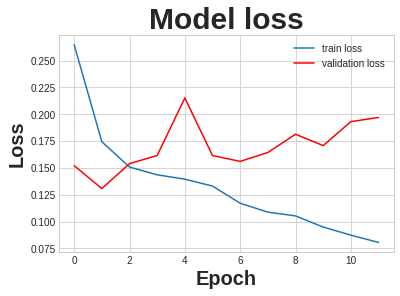

<Figure size 1152x648 with 0 Axes>

In [33]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [34]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 43, 64)         53248     
_________________________________________________________________
dropout (Dropout)            (None, 1, 43, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2752)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                82590     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 135,869
Trainable params: 135,869
Non-trainable params: 0
__________________________________________________

In [35]:
# hold back 3 years data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14', 'Q']]

In [36]:
# hold back 3 years data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14', 'Q']]

In [37]:
# apply transform to test dataset
validateX = pipe.transform(df_test[['Pt-130', 'Rt-220', 'Tt-1', 'Tt-141', 'Tavgt-14']])

validateX[0]

array([-0.21754181,  0.92213629,  0.55760544,  1.47873297,  0.41411592])

In [38]:
# Let’s standardize data
validateY = scaler.transform(df_test[['Q']])
validateY[0]

array([0.56927641])

In [39]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(x_test_multi.shape)

Single window of past history
[[-2.17541807e-01  9.22136294e-01  5.57605435e-01  1.47873297e+00
   4.14115921e-01]
 [ 3.55085490e-01  9.37321188e-01  3.55504073e-01  1.76402261e+00
   3.65356814e-01]
 [ 1.46932632e+00  9.38527014e-01  2.28859914e-01  2.03730659e+00
   3.42231685e-01]
 [ 5.23161510e-02  9.42729293e-01  3.61461977e-01  7.88410463e-01
   3.73449383e-01]
 [ 1.37565936e-01  9.49179502e-01  5.28656703e-01  7.34007005e-01
   4.59198781e-01]
 [ 1.05150913e+00  9.57036478e-01  5.23363832e-01  6.45590575e-01
   5.13830908e-01]
 [ 5.59565848e-01  9.71195424e-01  6.05622841e-01  8.56192219e-01
   5.26010678e-01]
 [ 2.94535076e-01  9.78600731e-01  5.17334639e-01  1.45958391e+00
   5.28129568e-01]
 [ 7.17904755e-01  9.83930255e-01  4.90794353e-01  2.09672107e+00
   5.39399804e-01]
 [ 4.99041774e-01  9.91407729e-01  6.59766885e-01  1.74670729e+00
   5.51863398e-01]
 [-4.44604133e-02  9.95287577e-01  6.33268370e-01  7.87654076e-01
   5.53390711e-01]
 [ 3.99058474e-01  1.00316214e+00  

In [40]:
# reshape for ConvLSTM2D
x_test_multi_ConvLSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 1,
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_ConvLSTM.shape)

(897, 2, 1, 45, 5)


In [41]:
# predictions for ConvLSTM2D

predictions = []
for i in x_test_multi_ConvLSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2], i.shape[3])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[1.148158]]


In [42]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(897, 1)


In [43]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[1670.1439]
(897, 1)


In [44]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(897).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83585863]
KGE' is : [0.8365673]
r is : [0.93351471], gamma is : [0.89264394]
KGE is : [0.76511052]
alpha is : [0.80002964], beta is : [0.89624726]
PBIAS is : [10.3752735]
RMSE is : 312.2328997805629
MARE is : [0.23748498]
MSE is : 97489.38370537903
MAE is : 235.1714503613337
MAPE is : 63.18080435132891
R2 is : 0.835858630481666



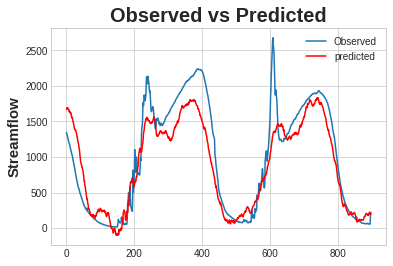

<Figure size 1152x648 with 0 Axes>

In [45]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(897)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Observed vs Predicted",size=20,fontweight='bold')
plt.ylabel("Streamflow",size=15,fontweight='semibold')
plt.legend(('Observed','predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [46]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/ConvLSTM_Multi_Niamey_Q_1step_90days_gpm_tanh.csv', index=False)

In [47]:
# Hybrid CNN LSTM

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [48]:
# tensorflow version
tf.__version__

'2.4.1'

In [49]:
# reshape input feature for Hybrid CNN LSTM 
x_train_multi_CNN_LSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_LSTM.shape)

x_val_multi_CNN_LSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_LSTM.shape)

(4836, 2, 45, 5)
(1096, 2, 45, 5)


In [50]:
# Prepare  CNN LSTM training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_LSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_LSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [51]:
# Define the CNN LSTM model

CNN_LSTM_model = Sequential()
CNN_LSTM_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_LSTM.shape[2], x_train_multi_CNN_LSTM.shape[3]))))
CNN_LSTM_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_LSTM_model.add(TimeDistributed(Dropout(0.2)))
CNN_LSTM_model.add(TimeDistributed(Flatten()))
CNN_LSTM_model.add(LSTM(units=100,activation='tanh'))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(horizon))
CNN_LSTM_model.compile(optimizer='adam', loss='mse')

In [52]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/CNN_LSTM_Multi_Niamey_Q_1step_90days_gpm_tanh.h5'

In [53]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = CNN_LSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 5s 26ms/step - loss: 0.3260 - val_loss: 0.1484
Epoch 2/150
100/100 [==============================] - 1s 8ms/step - loss: 0.1252 - val_loss: 0.1276
Epoch 3/150
100/100 [==============================] - 1s 8ms/step - loss: 0.1200 - val_loss: 0.1411
Epoch 4/150
100/100 [==============================] - 1s 7ms/step - loss: 0.1056 - val_loss: 0.1476
Epoch 5/150
100/100 [==============================] - 1s 7ms/step - loss: 0.0942 - val_loss: 0.1471
Epoch 6/150
100/100 [==============================] - 1s 7ms/step - loss: 0.0852 - val_loss: 0.1407
Epoch 7/150
100/100 [==============================] - 1s 8ms/step - loss: 0.0733 - val_loss: 0.1622
Epoch 8/150
100/100 [==============================] - 1s 7ms/step - loss: 0.0642 - val_loss: 0.1733
Epoch 9/150
100/100 [==============================] - 1s 7ms/step - loss: 0.0660 - val_loss: 0.1612
Epoch 10/150
100/100 [==============================] - 1s 7ms/step - loss: 0.0538 - val_l

In [54]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

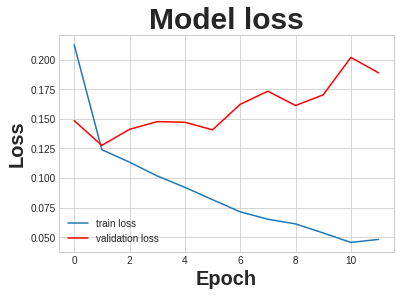

<Figure size 1152x648 with 0 Axes>

In [55]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [56]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 2, 43, 64)         1024      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2, 1344)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               578000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [57]:
# reshape for Hybrid CNN LSTM
x_test_multi_CNN_LSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_LSTM.shape)
print(len(x_test_multi_CNN_LSTM))

(897, 2, 45, 5)
897


In [58]:
# predictions for hybrid CNN LSTM

predictions = []
for i in x_test_multi_CNN_LSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[1.243608]]


In [59]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(897, 1)


In [60]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[1731.588]
(897, 1)


In [61]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(897).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83768647]
KGE' is : [0.80672968]
r is : [0.93129257], gamma is : [0.83036203]
KGE is : [0.76019768]
alpha is : [0.7788015], beta is : [0.937906]
PBIAS is : [6.20940047]
RMSE is : 310.4895527778171
MARE is : [0.24106424]
MSE is : 96403.76238416888
MAE is : 238.71584389642996
MAPE is : 97.00808632811147
R2 is : 0.8376864743316206



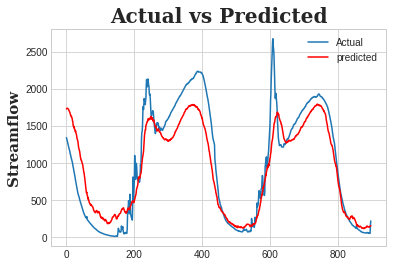

<Figure size 1152x648 with 0 Axes>

In [62]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(897)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted",size=20,fontweight='bold',family='serif')
plt.ylabel("Streamflow",size=15,fontweight='semibold',family='serif')
plt.legend(('Actual','predicted'))  # plt.legend(('Actual','predicted'), loc=' upper left ')
plt.figure(figsize=(16,9))
plt.show()

In [63]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/CNN_LSTM_Multi_Niamey_Q_1step_90days_gpm_tanh.csv', index=False)

In [64]:
# Hybrid CNN GRU

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [65]:
# tensorflow version
tf.__version__

'2.4.1'

In [66]:
# reshape input feature for Hybrid CNN GRU 
x_train_multi_CNN_GRU = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_GRU.shape)

x_val_multi_CNN_GRU = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_GRU.shape)
print(len(x_val_multi_CNN_GRU))

(4836, 2, 45, 5)
(1096, 2, 45, 5)
1096


In [67]:
# Prepare  CNN GRU training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_GRU, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_GRU, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [68]:
# Define the CNN GRU model

CNN_GRU_model = Sequential()
CNN_GRU_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_GRU.shape[2], x_train_multi_CNN_GRU.shape[3]))))
CNN_GRU_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_GRU_model.add(TimeDistributed(Dropout(0.2)))
CNN_GRU_model.add(TimeDistributed(Flatten()))
CNN_GRU_model.add(GRU(units=100,activation='tanh'))
CNN_GRU_model.add(Dropout(0.2))
CNN_GRU_model.add(Dense(horizon))
CNN_GRU_model.compile(optimizer='adam', loss='mse')

In [69]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/CNN_GRU_Multi_Niamey_Q_1step_90days_gpm_tanh.h5'

In [70]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = CNN_GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 3s 13ms/step - loss: 0.3356 - val_loss: 0.1945
Epoch 2/150
100/100 [==============================] - 1s 10ms/step - loss: 0.1426 - val_loss: 0.1307
Epoch 3/150
100/100 [==============================] - 1s 10ms/step - loss: 0.1289 - val_loss: 0.1427
Epoch 4/150
100/100 [==============================] - 1s 10ms/step - loss: 0.1140 - val_loss: 0.1449
Epoch 5/150
100/100 [==============================] - 1s 10ms/step - loss: 0.1029 - val_loss: 0.1418
Epoch 6/150
100/100 [==============================] - 1s 9ms/step - loss: 0.0947 - val_loss: 0.1323
Epoch 7/150
100/100 [==============================] - 1s 9ms/step - loss: 0.0849 - val_loss: 0.1480
Epoch 8/150
100/100 [==============================] - 1s 10ms/step - loss: 0.0723 - val_loss: 0.1751
Epoch 9/150
100/100 [==============================] - 1s 10ms/step - loss: 0.0684 - val_loss: 0.1708
Epoch 10/150
100/100 [==============================] - 1s 10ms/step - loss: 0.0608 

In [71]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

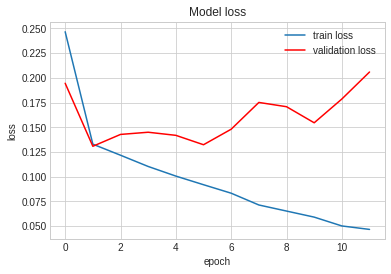

<Figure size 1152x648 with 0 Axes>

In [72]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

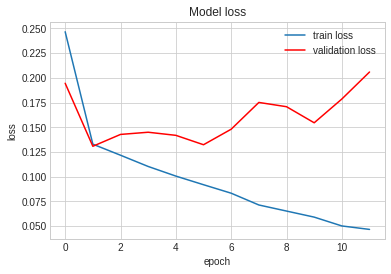

<Figure size 1152x648 with 0 Axes>

In [73]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [74]:
# Check the model summary
Trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 2, 43, 64)         1024      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 1344)           0         
_________________________________________________________________
gru (GRU)                    (None, 100)               433800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [75]:
# reshape for Hybrid CNN GRU
x_test_multi_CNN_GRU = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_GRU.shape)
print(len(x_test_multi_CNN_GRU))

(897, 2, 45, 5)
897


In [76]:
# predictions for hybrid CNN GRU

predictions = []
for i in x_test_multi_CNN_GRU:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[1.1813736]]


In [77]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(897, 1)


In [78]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[1691.5259]
(897, 1)


In [79]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(897).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.84324972]
KGE' is : [0.81675278]
r is : [0.93263846], gamma is : [0.84082446]
KGE is : [0.77088777]
alpha is : [0.78964382], beta is : [0.93913034]
PBIAS is : [6.08696601]
RMSE is : 305.12219482063443
MARE is : [0.22878307]
MSE is : 93099.5537721612
MAE is : 226.554310897606
MAPE is : 95.34415596636006
R2 is : 0.8432497193346689



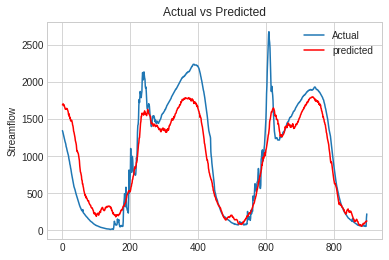

In [80]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(897)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [81]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/CNN_GRU_Multi_Niamey_Q_1step_90days_gpm_tanh_history.csv', index=False)

In [82]:
# 4th Model
# Auto-encoder LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [83]:
# tensorflow version
tf.__version__

'2.4.1'

In [84]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [85]:
# Define the Auto-encoder LSTM model

# Define the auto-encoder LSTM model.
ED_lstm_model = Sequential([
    LSTM(40, input_shape=x_train_multi.shape[-2:], 
    return_sequences=True),
    LSTM(units=20,return_sequences=True),
    LSTM(units=15),
    RepeatVector(y_train_multi.shape[1]),
    LSTM(units=40,return_sequences=True),
    LSTM(units=25,return_sequences=True),
    TimeDistributed(tf.keras.layers.Dense(units=1))
])
ED_lstm_model.compile(optimizer='adam', loss='mse')

In [86]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/ED_LSTM_Multi_Niamey_Q_1step_90days_gpm_tanh.h5'

In [87]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = ED_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 11s 51ms/step - loss: 0.7811 - val_loss: 0.1724
Epoch 2/150
100/100 [==============================] - 3s 34ms/step - loss: 0.1307 - val_loss: 0.1369
Epoch 3/150
100/100 [==============================] - 3s 34ms/step - loss: 0.1099 - val_loss: 0.1419
Epoch 4/150
100/100 [==============================] - 3s 34ms/step - loss: 0.0963 - val_loss: 0.1228
Epoch 5/150
100/100 [==============================] - 3s 34ms/step - loss: 0.0867 - val_loss: 0.1395
Epoch 6/150
100/100 [==============================] - 3s 34ms/step - loss: 0.0821 - val_loss: 0.1246
Epoch 7/150
100/100 [==============================] - 3s 34ms/step - loss: 0.0803 - val_loss: 0.1294
Epoch 8/150
100/100 [==============================] - 3s 34ms/step - loss: 0.0678 - val_loss: 0.1348
Epoch 9/150
100/100 [==============================] - 3s 34ms/step - loss: 0.0593 - val_loss: 0.1562
Epoch 10/150
100/100 [==============================] - 3s 34ms/step - loss: 0.05

In [88]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

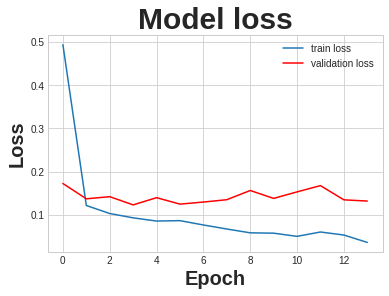

<Figure size 1152x648 with 0 Axes>

In [89]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [90]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 90, 40)            7360      
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 20)            4880      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 15)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 40)             8960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 1)             

In [91]:
# predictions for AutoEncoder

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[[1.1654797]]]


In [92]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(897, 1)


In [93]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[1681.2944]
(897, 1)
897


In [94]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(897).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.80713601]
KGE' is : [0.82558303]
r is : [0.92384056], gamma is : [0.9192983]
KGE is : [0.74369646]
alpha is : [0.79559112], beta is : [0.86543308]
PBIAS is : [13.45669206]
RMSE is : 338.4505367002855
MARE is : [0.24153096]
MSE is : 114548.76579271132
MAE is : 239.17801466313492
MAPE is : 42.31683995925643
R2 is : 0.8071360123613838



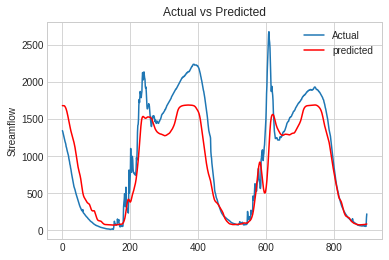

In [95]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(897)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [96]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/ED_LSTM_Multi_Niamey_Q_1step_90days_gpm.csv', index=False)

In [97]:
# 5th Model
# CNN Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [98]:
# tensorflow version
tf.__version__

'2.4.1'

In [99]:
# Define the CNN model

CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
CNN_model.add(MaxPool1D(pool_size=2))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30, activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(horizon))
CNN_model.compile(optimizer='adam', loss='mse')

In [100]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/CNN_Multi_Niamey_Q_1step_90days_gpm_v1.h5'

In [101]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = CNN_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 4s 23ms/step - loss: 0.3442 - val_loss: 0.1600
Epoch 2/150
100/100 [==============================] - 1s 6ms/step - loss: 0.1940 - val_loss: 0.1530
Epoch 3/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1885 - val_loss: 0.1590
Epoch 4/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1648 - val_loss: 0.1538
Epoch 5/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1487 - val_loss: 0.1700
Epoch 6/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1441 - val_loss: 0.1475
Epoch 7/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1336 - val_loss: 0.1638
Epoch 8/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1256 - val_loss: 0.1756
Epoch 9/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1252 - val_loss: 0.1452
Epoch 10/150
100/100 [==============================] - 1s 5ms/step - loss: 0.1165 - val_l

In [102]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

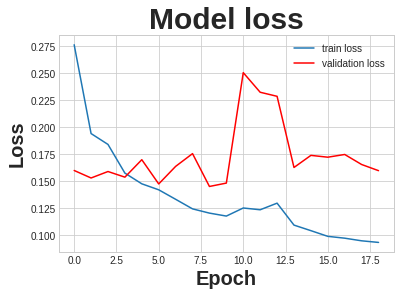

<Figure size 1152x648 with 0 Axes>

In [103]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [104]:
# Check the model summary
Trained_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 88, 64)            1024      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 44, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 44, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2816)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                84510     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [105]:
# predictions for CNN

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.943926]]


In [106]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(897, 1)


In [107]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[1538.6735]
(897, 1)
897


In [108]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(897).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81941768]
KGE' is : [0.82292475]
r is : [0.93452292], gamma is : [0.91065902]
KGE is : [0.73605989]
alpha is : [0.78484762], beta is : [0.86184579]
PBIAS is : [13.81542125]
RMSE is : 327.49693862084564
MARE is : [0.25408573]
MSE is : 107254.24480602592
MAE is : 251.61048084307942
MAPE is : 64.31563707907199
R2 is : 0.8194176846750914



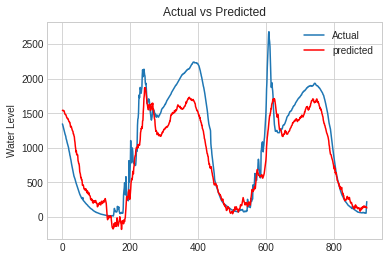

In [109]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(897)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Water Level")
plt.legend(('Actual','predicted'))
plt.show()

In [110]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/CNN_Multi_Niamey_Q_1step_90days_gpm_history_v1.csv', index=False)

In [111]:
# 6th Model
# LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [112]:
# tensorflow version
tf.__version__

'2.4.1'

In [113]:
# Define the LSTM model

lstm_multi = Sequential()
lstm_multi.add(LSTM(
    150,input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(LSTM(units=100,return_sequences=False)),
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [114]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/LSTM_Multi_Niamey_Q_1step_90days_gpm.h5'

In [115]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 8s 58ms/step - loss: 0.2672 - val_loss: 0.1779
Epoch 2/150
100/100 [==============================] - 5s 49ms/step - loss: 0.1728 - val_loss: 0.1560
Epoch 3/150
100/100 [==============================] - 5s 49ms/step - loss: 0.1532 - val_loss: 0.1456
Epoch 4/150
100/100 [==============================] - 5s 48ms/step - loss: 0.1265 - val_loss: 0.1192
Epoch 5/150
100/100 [==============================] - 5s 48ms/step - loss: 0.1128 - val_loss: 0.1399
Epoch 6/150
100/100 [==============================] - 5s 49ms/step - loss: 0.1141 - val_loss: 0.1241
Epoch 7/150
100/100 [==============================] - 5s 48ms/step - loss: 0.1035 - val_loss: 0.1123
Epoch 8/150
100/100 [==============================] - 5s 49ms/step - loss: 0.0937 - val_loss: 0.1368
Epoch 9/150
100/100 [==============================] - 5s 49ms/step - loss: 0.0869 - val_loss: 0.1380
Epoch 10/150
100/100 [==============================] - 5s 48ms/step - loss: 0.084

In [116]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

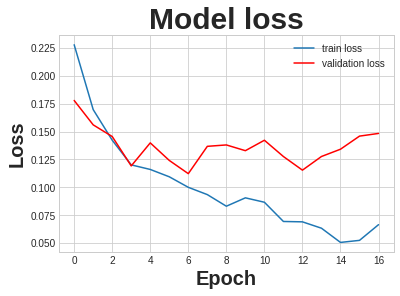

<Figure size 1152x648 with 0 Axes>

In [117]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [118]:
# Check the model summary
Trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 90, 150)           93600     
_________________________________________________________________
dropout_8 (Dropout)          (None, 90, 150)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 194,101
Trainable params: 194,101
Non-trainable params: 0
_________________________________________________________________


In [119]:
# predictions for LSTM

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[1.2155889]]


In [120]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(897, 1)


In [121]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[1713.5513]
(897, 1)
897


In [122]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(897).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83639121]
KGE' is : [0.84327948]
r is : [0.92681476], gamma is : [0.88622762]
KGE is : [0.78684452]
alpha is : [0.81610304], beta is : [0.92087298]
PBIAS is : [7.91270218]
RMSE is : 311.72594536771925
MARE is : [0.22361258]
MSE is : 97173.0650153983
MAE is : 221.43419338468723
MAPE is : 54.96798838012874
R2 is : 0.8363912113741105



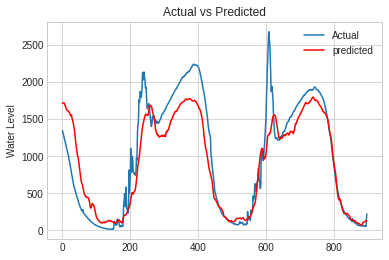

In [123]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(897)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Water Level")
plt.legend(('Actual','predicted'))
plt.show()

In [124]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/LSTM_Multi_Niamey_Q_1step_90days_gpm_history.csv', index=False)

In [125]:
# 7th Model
# GRU Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [126]:
# tensorflow version
tf.__version__

'2.4.1'

In [127]:
# # Define the GRU model

GRU_model = Sequential([
    GRU(100, input_shape=x_train_multi.shape[-2:],return_sequences=True),
    Dropout(0.2),
    GRU(units=50,return_sequences=False),
    Dropout(0.2),
    Dense(units=horizon),
])
GRU_model.compile(optimizer='adam', loss='mse')

In [128]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/GRU_Multi_Niamey_Q_1step_90days_gpm.h5'

In [129]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 100
EPOCHS = 150
history = GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 6s 40ms/step - loss: 0.3292 - val_loss: 0.1869
Epoch 2/150
100/100 [==============================] - 3s 31ms/step - loss: 0.1991 - val_loss: 0.1911
Epoch 3/150
100/100 [==============================] - 3s 32ms/step - loss: 0.1844 - val_loss: 0.1779
Epoch 4/150
100/100 [==============================] - 3s 32ms/step - loss: 0.1706 - val_loss: 0.1462
Epoch 5/150
100/100 [==============================] - 3s 31ms/step - loss: 0.1479 - val_loss: 0.1297
Epoch 6/150
100/100 [==============================] - 3s 31ms/step - loss: 0.1299 - val_loss: 0.1386
Epoch 7/150
100/100 [==============================] - 3s 31ms/step - loss: 0.1205 - val_loss: 0.1304
Epoch 8/150
100/100 [==============================] - 3s 31ms/step - loss: 0.1104 - val_loss: 0.1228
Epoch 9/150
100/100 [==============================] - 3s 31ms/step - loss: 0.1104 - val_loss: 0.1145
Epoch 10/150
100/100 [==============================] - 3s 32ms/step - loss: 0.101

In [130]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

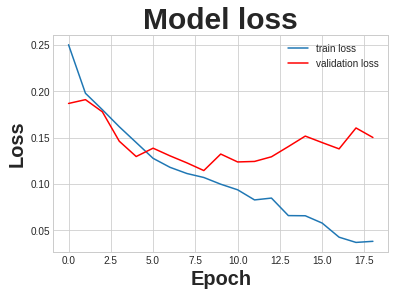

<Figure size 1152x648 with 0 Axes>

In [131]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [132]:
# Check the model summary
Trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 90, 100)           32100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 54,951
Trainable params: 54,951
Non-trainable params: 0
_________________________________________________________________


In [133]:
# predictions for GRU

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[1.0535762]]


In [134]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(897, 1)


In [135]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[1609.2588]
(897, 1)
897


In [136]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(897).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.83647131]
KGE' is : [0.83619529]
r is : [0.93568647], gamma is : [0.89771047]
KGE is : [0.76124853]
alpha is : [0.79842263], beta is : [0.88939889]
PBIAS is : [11.06011055]
RMSE is : 311.64962770753374
MARE is : [0.23405336]
MSE is : 97125.49045024438
MAE is : 231.77326153282073
MAPE is : 51.77144661872124
R2 is : 0.8364713119346208



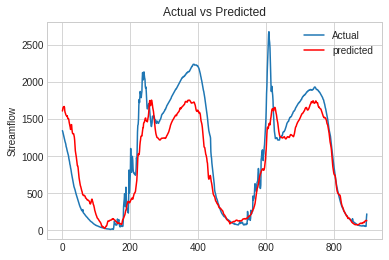

In [137]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(897)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Streamflow")
plt.legend(('Actual','predicted'))
plt.show()

In [138]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/niamey_models/GRU_Multi_Niamey_Q_1step_90days_gpm_history.csv', index=False)

In [139]:
# 8th Model Bidirectional LSTM

# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [140]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [141]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/niamey_models/Bidirectional_LSTM_Multi_Niamey_Q_1step_90days_gpm.h5'

In [142]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 100
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/100
150/150 [==============================] - 20s 95ms/step - loss: 0.3282 - val_loss: 0.1428
Epoch 2/100
150/150 [==============================] - 13s 86ms/step - loss: 0.1501 - val_loss: 0.1432
Epoch 3/100
150/150 [==============================] - 13s 86ms/step - loss: 0.1421 - val_loss: 0.1352
Epoch 4/100
150/150 [==============================] - 13s 86ms/step - loss: 0.1196 - val_loss: 0.1259
Epoch 5/100
150/150 [==============================] - 13s 86ms/step - loss: 0.1011 - val_loss: 0.1170
Epoch 6/100
150/150 [==============================] - 13s 86ms/step - loss: 0.1006 - val_loss: 0.1254
Epoch 7/100
150/150 [==============================] - 13s 86ms/step - loss: 0.0791 - val_loss: 0.1455
Epoch 8/100
150/150 [==============================] - 13s 86ms/step - loss: 0.0855 - val_loss: 0.1395
Epoch 9/100
150/150 [==============================] - 13s 86ms/step - loss: 0.0755 - val_loss: 0.1426
Epoch 10/100
150/150 [==============================] - 13s 86ms/step - l

In [143]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

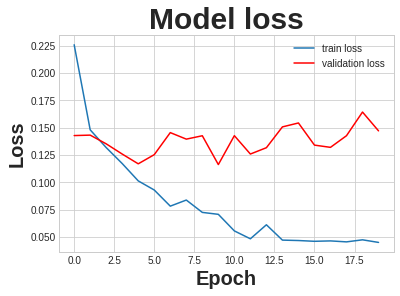

<Figure size 1152x648 with 0 Axes>

In [144]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=30,fontweight='bold')
plt.ylabel('Loss',size=20,fontweight='semibold')
plt.xlabel('Epoch',size=20,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [145]:
# Check the model summary
Trained_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 90, 300)           187200    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 329,641
Trainable params: 329,641
Non-trainable params: 0
_________________________________________________________________


In [146]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[1.1407576]]


In [147]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(897, 1)


In [148]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[1665.38]
(897, 1)


In [149]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['Q'].tail(897).values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.8444084]
KGE' is : [0.79620136]
r is : [0.94457143], gamma is : [0.82246629]
KGE is : [0.7343598]
alpha is : [0.75393283], beta is : [0.9166733]
PBIAS is : [8.33267032]
RMSE is : 303.99238676549584
MARE is : [0.2546742]
MSE is : 92411.37121138282
MAE is : 252.19321431682
MAPE is : 90.48961445022488
R2 is : 0.8444084016825455



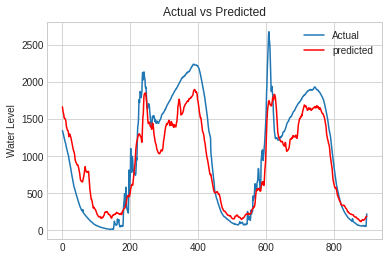

In [150]:
# Plot the actual versus predicted values.
plt.plot( list(validate['Q'].tail(897)))
plt.plot( list(predictions_Inv_trans),color='red')
plt.title("Actual vs Predicted")
plt.ylabel("Water Level")
plt.legend(('Actual','predicted'))
plt.show()